## TASK 2

## UNEMPLOYMENT ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("C:/Users/asus/Downloads/Unemployment in India.csv")
df


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head( )


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [9]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 
              'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region'],
      dtype='object')

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

C:\Users\asus\AppData\Local\Temp\ipykernel_15208\1793818658.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
763          NaT
764          NaT
765          NaT
766          NaT
767          NaT
Name: Date, Length: 768, dtype: datetime64[ns]

In [11]:
# View all states
print(df['States'].unique())

# View all regions
print(df['Region'].unique())

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']
['Rural' nan 'Urban']


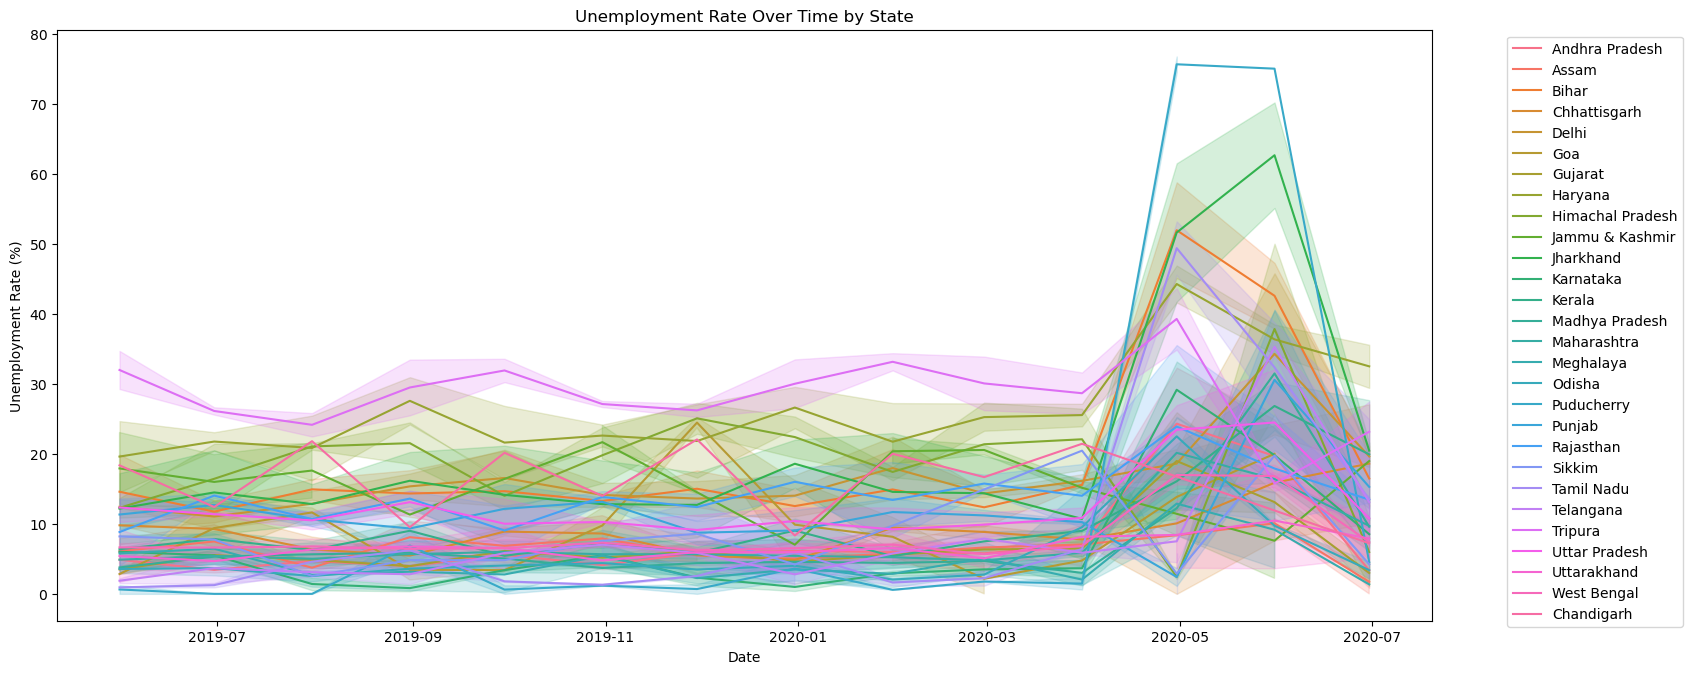

In [11]:
plt.figure(figsize=(17,7))
sns.lineplot(x='Date', y='Estimated Unemployment Rate', data=df, hue='States')
plt.title("Unemployment Rate Over Time by State")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


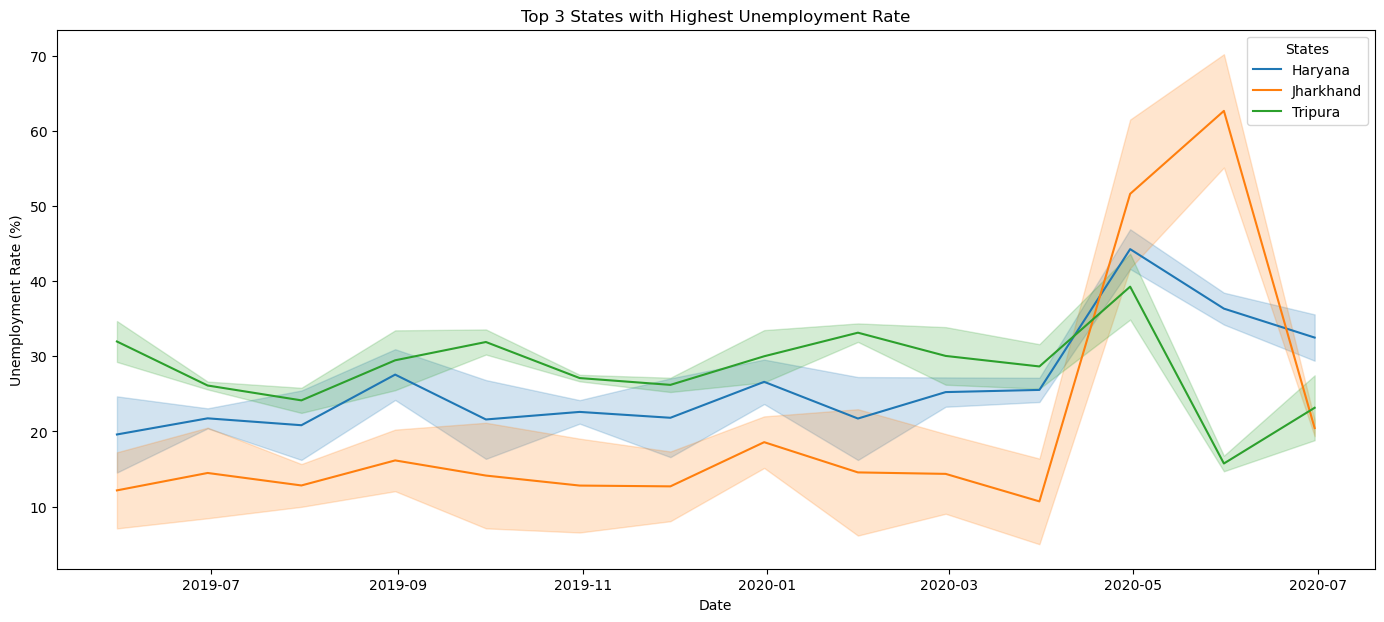

In [12]:
top_states = df.groupby('States')['Estimated Unemployment Rate'].mean().sort_values(ascending=False).head(3).index
top_df = df[df['States'].isin(top_states)]
plt.figure(figsize=(17,7))
sns.lineplot(x='Date', y='Estimated Unemployment Rate', hue='States', data=top_df)
plt.title('Top 3 States with Highest Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


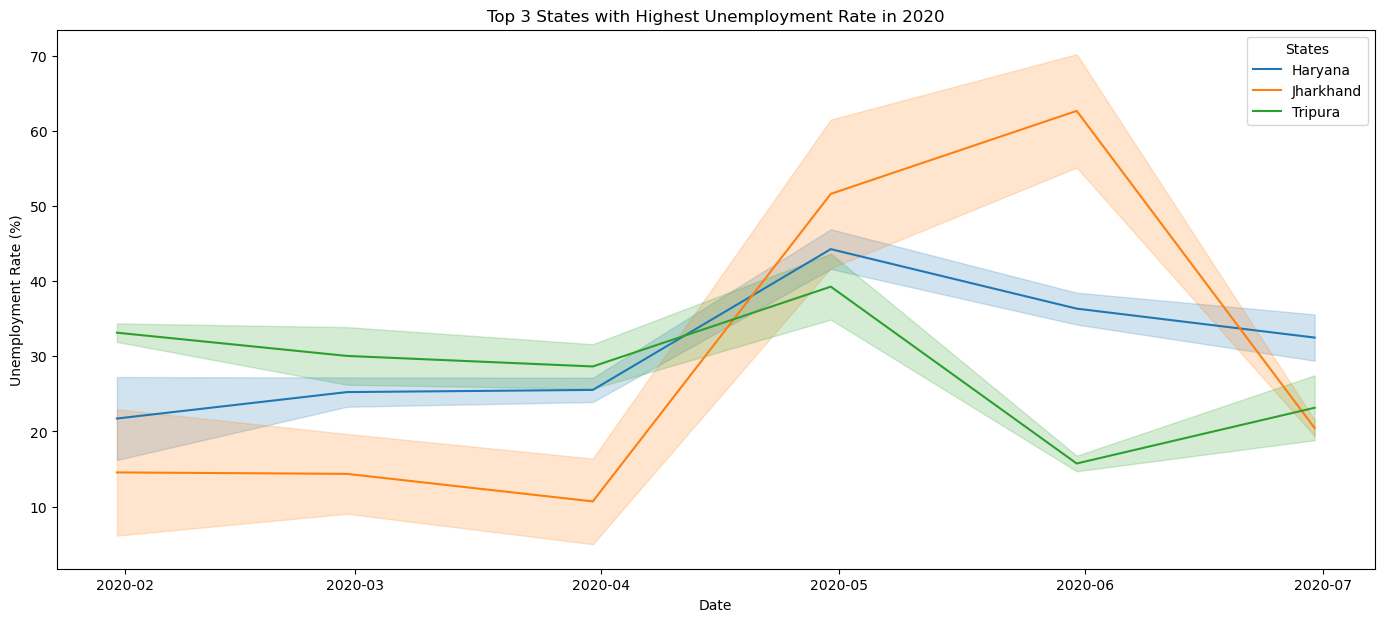

In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_2020 = df[df['Date'].dt.year == 2020]
top_states_2020 = df_2020.groupby('States')['Estimated Unemployment Rate'].mean().sort_values(ascending=False).head(3).index
top_df_2020 = df_2020[df_2020['States'].isin(top_states_2020)]
plt.figure(figsize=(17,7))
sns.lineplot(x='Date', y='Estimated Unemployment Rate', hue='States', data=top_df_2020)
plt.title('Top 3 States with Highest Unemployment Rate in 2020')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


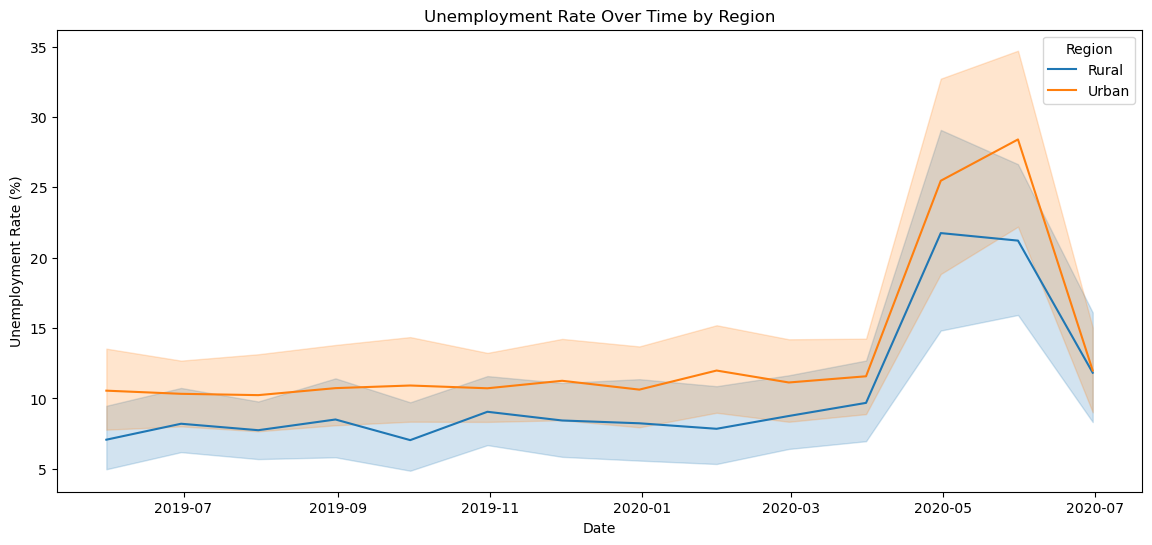

In [25]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_10676\3010487732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index, y=region_avg.values, palette='coolwarm')


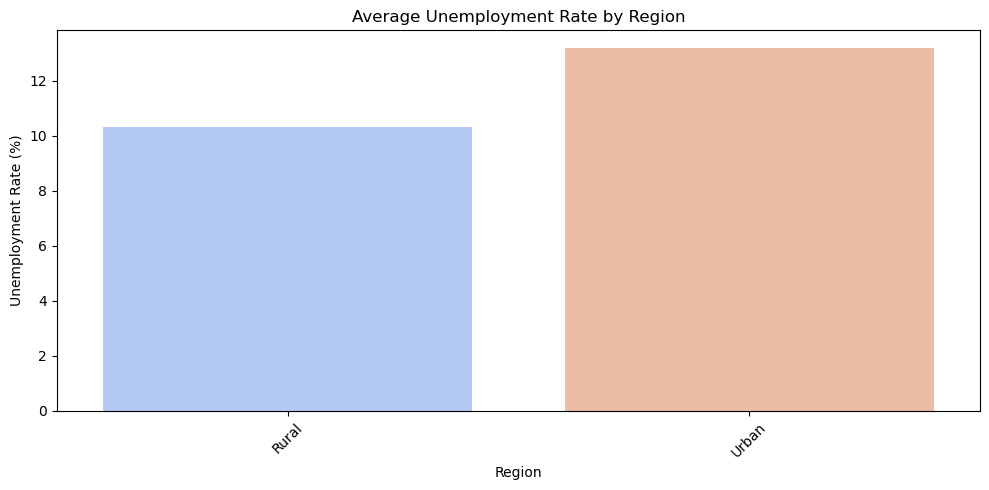

In [14]:
region_avg = df.groupby('Region')['Estimated Unemployment Rate'].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=region_avg.index, y=region_avg.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Average Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()


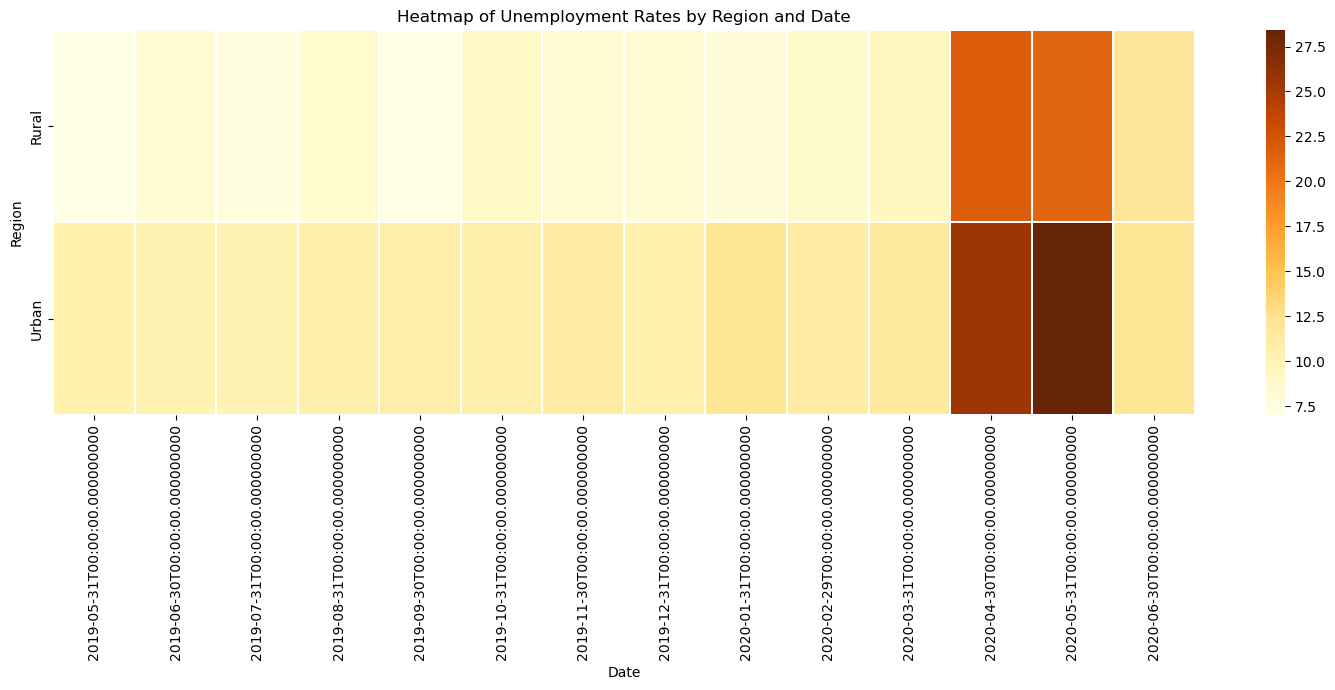

In [15]:
pivot = df.pivot_table(values='Estimated Unemployment Rate', index='Region', columns='Date')
plt.figure(figsize=(15,7))
sns.heatmap(pivot, cmap="YlOrBr", linecolor='white', linewidths=0.1)
plt.title("Heatmap of Unemployment Rates by Region and Date")
plt.xlabel("Date")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


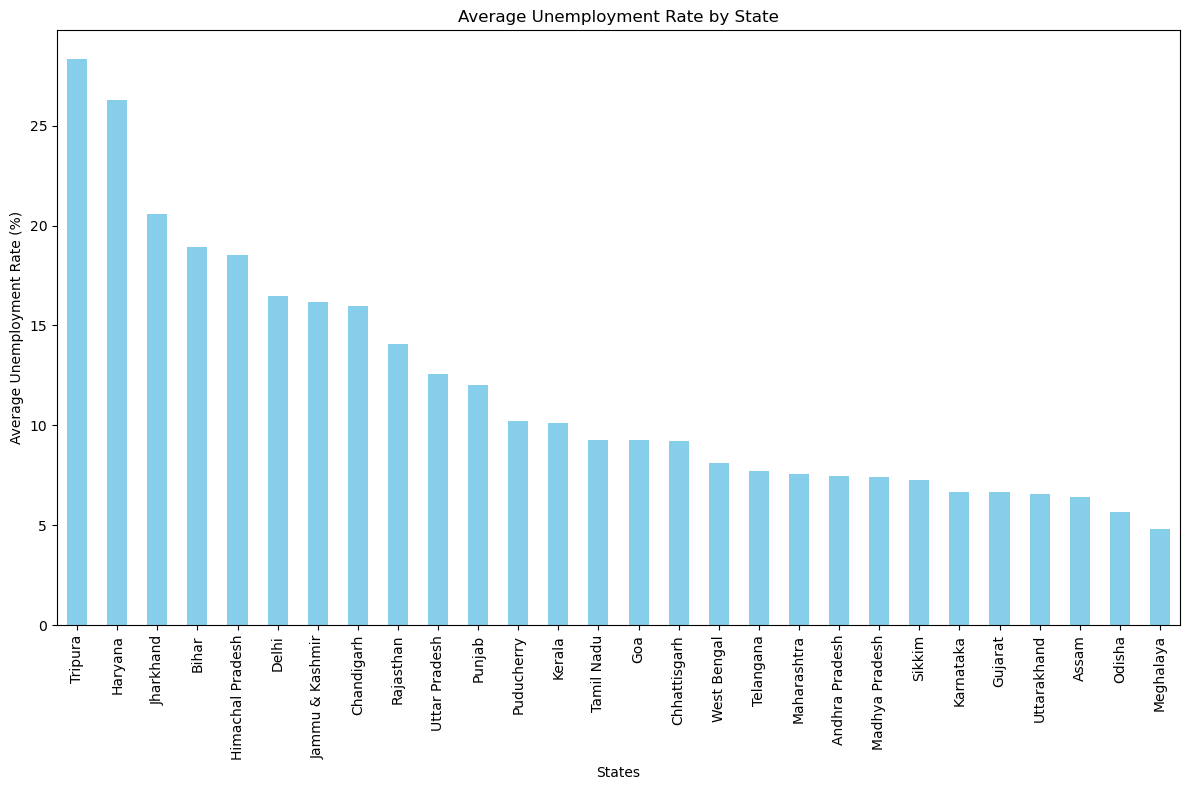

In [17]:
avg_state = df.groupby('States')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_state.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by State')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


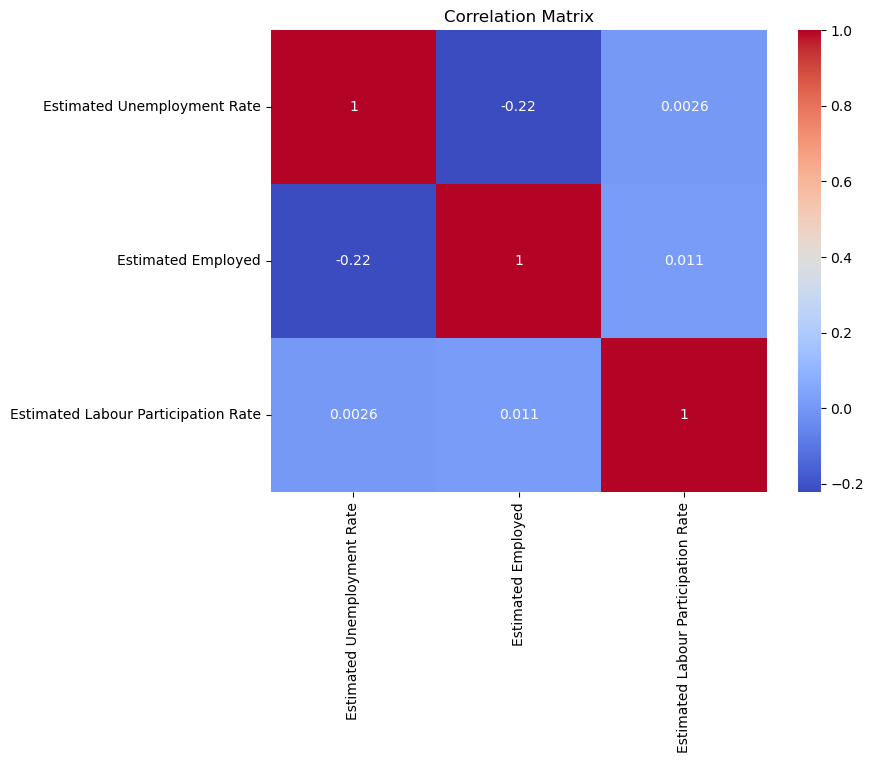

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Estimated Unemployment Rate', 
                'Estimated Employed', 
                'Estimated Labour Participation Rate']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


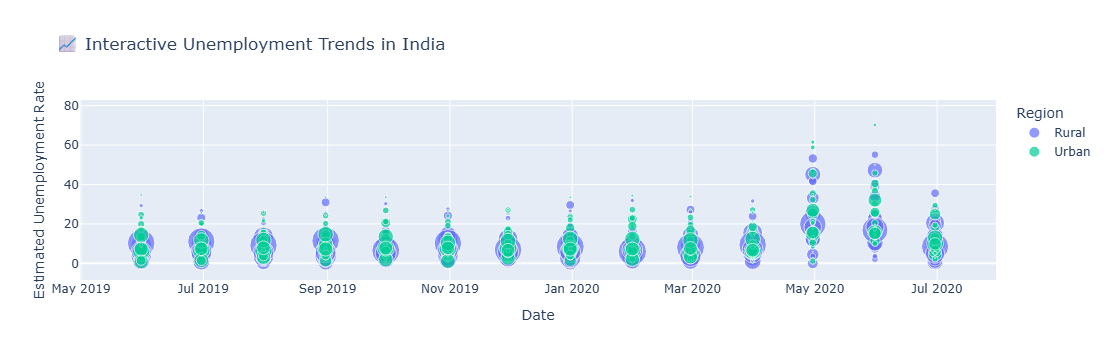

In [28]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Date",
    y="Estimated Unemployment Rate",
    color="Region",
    size="Estimated Employed",
    hover_name="States",
    title="📈 Interactive Unemployment Trends in India",
    size_max=20  # optional: control the bubble size
)

fig.show()


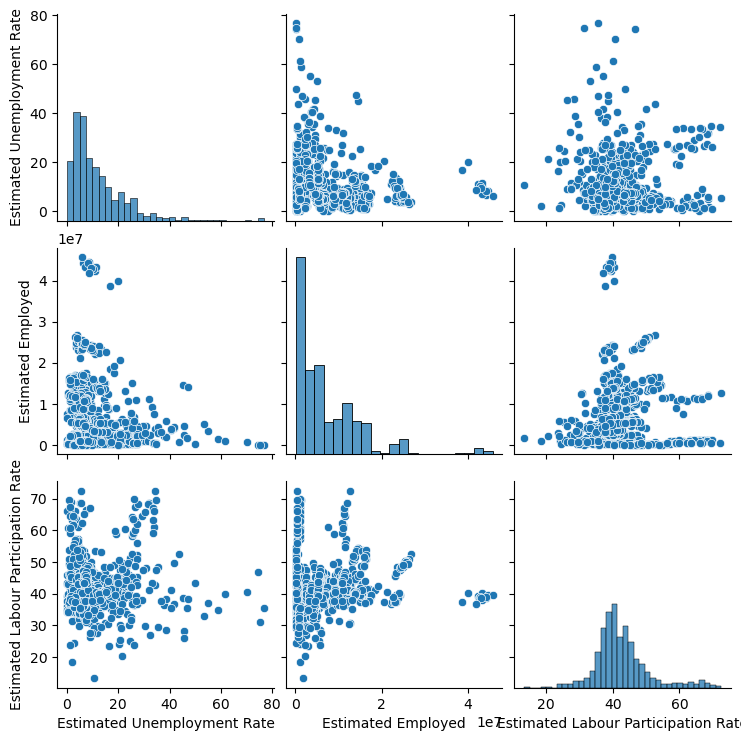

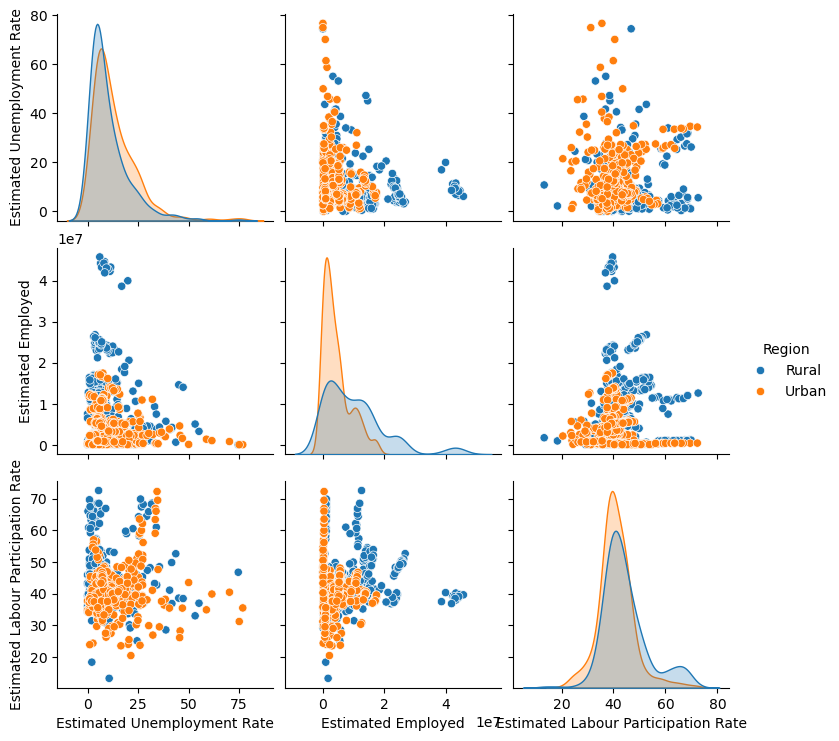

In [21]:
sns.pairplot(df)
sns.pairplot(df, hue='Region')
plt.show()